<a href="https://colab.research.google.com/github/hazerr/mlzoomcamp/blob/main/homework3_mlzoomcamp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mutual_info_score, accuracy_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.model_selection import GridSearchCV

In [2]:


df = pd.read_csv("https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv")


In [3]:
df_refined = df

In [4]:
df_refined.describe(include = 'all')

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
count,11914,11914,11914.000000,11911,11845.00000,11884.000000,11914,11914,11908.000000,8172,11914,11914,11914.000000,11914.000000,11914.000000,1.191400e+04
unique,48,915,NaN,10,NaN,NaN,5,4,NaN,71,3,16,NaN,NaN,NaN,NaN
top,Chevrolet,Silverado 1500,NaN,regular unleaded,NaN,NaN,AUTOMATIC,front wheel drive,NaN,Crossover,Compact,Sedan,NaN,NaN,NaN,NaN
freq,1123,156,NaN,7172,NaN,NaN,8266,4787,NaN,1110,4764,3048,NaN,NaN,NaN,NaN
mean,NaN,NaN,2010.384338,NaN,249.38607,5.628829,NaN,NaN,3.436093,NaN,NaN,NaN,26.637485,19.733255,1554.911197,4.059474e+04
std,NaN,NaN,7.579740,NaN,109.19187,1.780559,NaN,NaN,0.881315,NaN,NaN,NaN,8.863001,8.987798,1441.855347,6.010910e+04
min,NaN,NaN,1990.000000,NaN,55.00000,0.000000,NaN,NaN,2.000000,NaN,NaN,NaN,12.000000,7.000000,2.000000,2.000000e+03
25%,NaN,NaN,2007.000000,NaN,170.00000,4.000000,NaN,NaN,2.000000,NaN,NaN,NaN,22.000000,16.000000,549.000000,2.100000e+04
50%,NaN,NaN,2015.000000,NaN,227.00000,6.000000,NaN,NaN,4.000000,NaN,NaN,NaN,26.000000,18.000000,1385.000000,2.999500e+04
75%,NaN,NaN,2016.000000,NaN,300.00000,6.000000,NaN,NaN,4.000000,NaN,NaN,NaN,30.000000,22.000000,2009.000000,4.223125e+04


In [5]:
df_refined.head()


,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [6]:
df_refined.columns.tolist()

['Make',
 'Model',
 'Year',
 'Engine Fuel Type',
 'Engine HP',
 'Engine Cylinders',
 'Transmission Type',
 'Driven_Wheels',
 'Number of Doors',
 'Market Category',
 'Vehicle Size',
 'Vehicle Style',
 'highway MPG',
 'city mpg',
 'Popularity',
 'MSRP']

In [7]:
features = ["Make", "Model" ,"Year" ,"Engine HP", "Engine Cylinders", "Transmission Type", "Vehicle Style", "highway MPG","city mpg", "MSRP"]
df_refined = df_refined[features].copy()
df_refined.columns = df_refined.columns.str.replace(" ","_").str.lower()
df_refined.rename(columns={"msrp":"price"},inplace=True)

In [8]:
df_refined.columns.tolist()

['make',
 'model',
 'year',
 'engine_hp',
 'engine_cylinders',
 'transmission_type',
 'vehicle_style',
 'highway_mpg',
 'city_mpg',
 'price']

In [9]:
df_refined.fillna(0, inplace=True)
df_refined.isnull().sum()

make                 0
model                0
year                 0
engine_hp            0
engine_cylinders     0
transmission_type    0
vehicle_style        0
highway_mpg          0
city_mpg             0
price                0
dtype: int64

Question 1

In [10]:
df_refined.transmission_type.mode()

0    AUTOMATIC
Name: transmission_type, dtype: object

Question 2

In [11]:
df_refined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               11914 non-null  object 
 1   model              11914 non-null  object 
 2   year               11914 non-null  int64  
 3   engine_hp          11914 non-null  float64
 4   engine_cylinders   11914 non-null  float64
 5   transmission_type  11914 non-null  object 
 6   vehicle_style      11914 non-null  object 
 7   highway_mpg        11914 non-null  int64  
 8   city_mpg           11914 non-null  int64  
 9   price              11914 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 930.9+ KB


In [12]:
categorical = df_refined.dtypes[df_refined.dtypes =='object'].index.tolist()
numeric = df_refined.columns.difference(categorical).tolist()

In [13]:
corr = df_refined[numeric].corr()

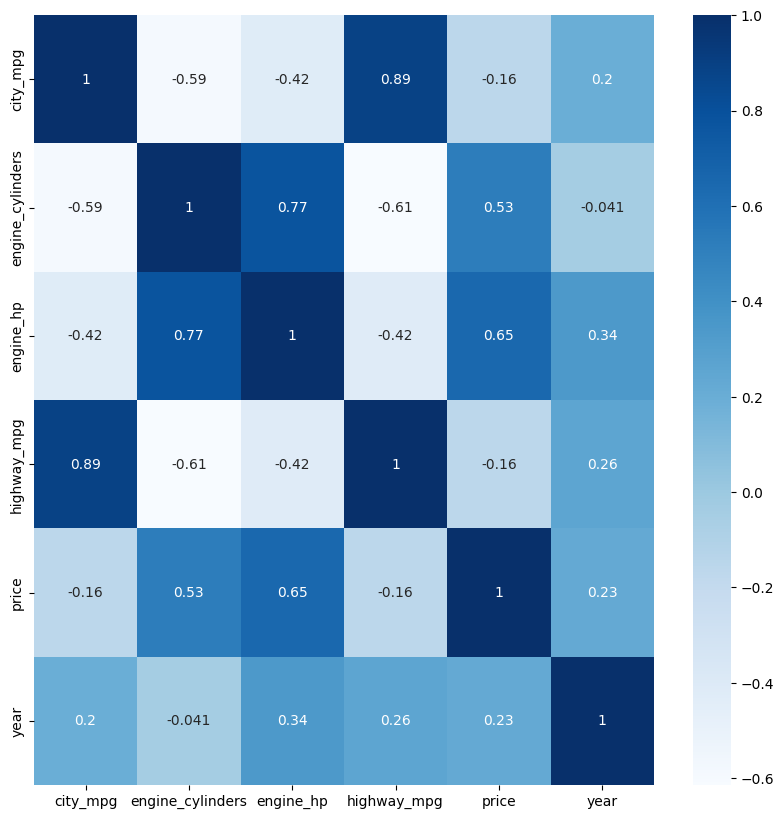

In [14]:

plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, cmap="Blues")
plt.show()

Question 3

In [15]:
price_mean= df_refined.price.mean()
price_mean

40594.737032063116

In [16]:
df_refined['above_average']= (df_refined.price > price_mean).astype('int64')

In [17]:
df_refined

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price,above_average
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135,1
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650,1
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350,0
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450,0
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500,0
...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,46120,1
11910,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,56670,1
11911,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,50620,1
11912,Acura,ZDX,2013,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,50920,1


In [18]:
features_x = df_refined.columns.difference(["above_average"]).tolist()
data_y = df_refined['above_average'].values
data_x = df_refined.drop(labels=["price","above_average"],axis=1)


np.random.seed(42)
x_train, x_test, y_train, y_test = train_test_split(data_x,data_y,test_size=0.2, random_state= 42)

x_train, x_val, y_train, y_val = train_test_split(x_train,y_train,test_size=0.25, random_state= 42)

In [19]:
def mutual(series):
    return mutual_info_score(series, y_train)


mi = x_train[categorical].apply(mutual)
mi = mi.round(2).sort_values(ascending=False).to_frame()
mi

,0
model,0.46
make,0.24
vehicle_style,0.08
transmission_type,0.02


Question 4

In [20]:
train_dict = x_train.to_dict(orient="records")
dv = DictVectorizer(sparse=False)
dv.fit((train_dict))
X_train = dv.fit_transform((train_dict))

model = LogisticRegression(solver='liblinear',C=10, max_iter=1000, random_state=42 )
model.fit(X_train,y_train)

val_dict = x_val.to_dict(orient='records')

X_val = dv.transform(val_dict)

y_pred = model.predict(X_val)

score_original = accuracy_score(y_val,y_pred)
score_original

0.9345362987830466


Question 5

In [21]:
data_x.columns.tolist()

['make',
 'model',
 'year',
 'engine_hp',
 'engine_cylinders',
 'transmission_type',
 'vehicle_style',
 'highway_mpg',
 'city_mpg']

In [23]:
table = pd.DataFrame(columns=["feature","difference","accuracy w/o feature"])
dat = {}
for feature in data_x.columns.tolist():
    features  = data_x.columns.tolist().copy()
    features.remove(feature)

    train_dict = x_train[features].to_dict(orient="records")
    dv = DictVectorizer(sparse=False)
    dv.fit((train_dict))
    X_train = dv.fit_transform((train_dict))

    model = LogisticRegression(solver='liblinear',C=10, max_iter=1000, random_state=42 )
    model.fit(X_train,y_train)

    val_dict = x_val[features].to_dict(orient='records')
    X_val = dv.transform(val_dict)

    y_pred = model.predict(X_val)
    score = accuracy_score(y_val,y_pred)

    dat[feature] = {"difference": np.abs(score_original - score), "accuracy w/o feature": score}

table = pd.DataFrame(data=dat.values(), index=dat.keys()).sort_values("difference", ascending=True)
table

,difference,accuracy w/o feature
engine_hp,0.000420,0.934956
vehicle_style,0.002518,0.932018
transmission_type,0.010491,0.945027
city_mpg,0.011330,0.945867
highway_mpg,0.012170,0.946706
engine_cylinders,0.012589,0.947125
year,0.013848,0.948384
make,0.014268,0.948804
model,0.018044,0.916492


Question 6

In [24]:
features_x = df_refined.columns.difference(["above_average"]).tolist()
data_y = np.log1p(df_refined['price'].values)
data_x = df_refined.drop(labels=["above_average"],axis=1)

np.random.seed(42)
x_train, x_test, y_train, y_test = train_test_split(data_x,data_y,test_size=0.2, random_state= 42)

x_train, x_val, y_train, y_val = train_test_split(x_train,y_train,test_size=0.25, random_state= 42)

<Axes: ylabel='Count'>

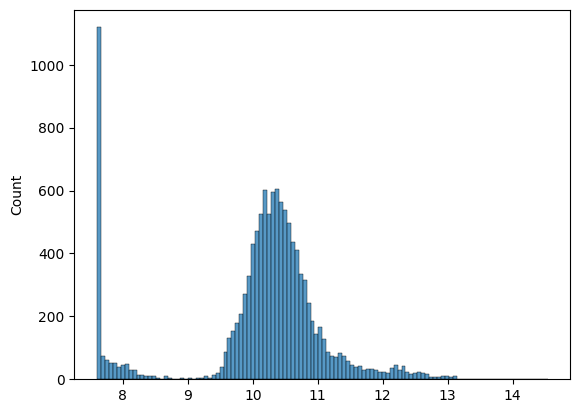

In [25]:
sns.histplot((data_y))

In [36]:


# Define the hyperparameter grid
param_grid = {
    'alpha': [0.01, 0.1, 1, 10],
}

# Create the GridSearchCV object
grid_search = GridSearchCV(Ridge(solver='lsqr'), param_grid, cv=5)

# Fit the models
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_


In [37]:
best_model

Ridge(alpha=1, solver='lsqr')

In [38]:

# Make predictions on the validation data
y_pred = best_model.predict(X_val)

# Calculate the RMSE
rmse = np.round(np.sqrt(mean_squared_error(y_val, y_pred)), 3)

# Print the RMSE
print(rmse)

0.265
